[[0.475]] [[[0.083126]]]


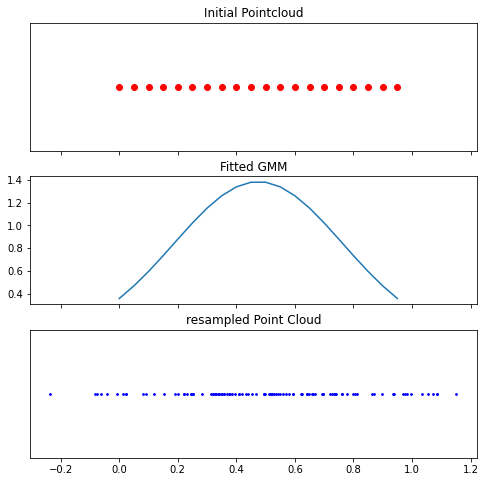

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.mixture
import scipy

points = np.arange(0.0, 1.0, 0.05).reshape(-1,1)
distribution = np.arange(-1.0, 2.0, 0.05).reshape(-1,1)


gmm_generator = sklearn.mixture.GaussianMixture(n_components = 1, max_iter = 30)
gmm_generator.fit(points)

mean = gmm_generator.means_
cov = gmm_generator.covariances_

print(mean, cov)

sigma = np.sqrt(cov).reshape(1,)
mu = mean.reshape(1,)

pdf = (1/(sigma * np.sqrt(2 * np.pi))
       * np.exp( - (points - mu)**2 / (2 * sigma**2))).reshape(-1,1)

samples = np.random.normal(mu, sigma, 100)



fig, ax = plt.subplots(3,1,figsize=(8,8), sharex = 'all')
ax[0].set_title('Initial Pointcloud')
ax[0].get_yaxis().set_visible(False)

#ax.title ="input point cloud"
ax[0].scatter(points, np.zeros(len(points)), c= 'r')

ax[1].set_title('Fitted GMM')
ax[1].plot(points, pdf)


ax[2].scatter(samples, np.zeros(len(samples)), c = 'b', s = 3)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title('resampled Point Cloud')
plt.show()

In [3]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

  starting hgmm_fit with num_points =  500
  finished hgmm, resulted in :  8  mixtures


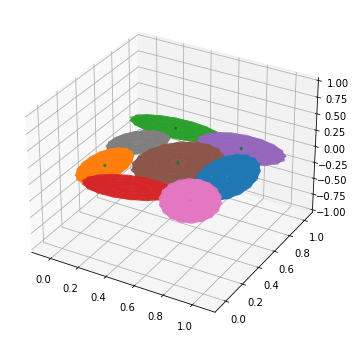

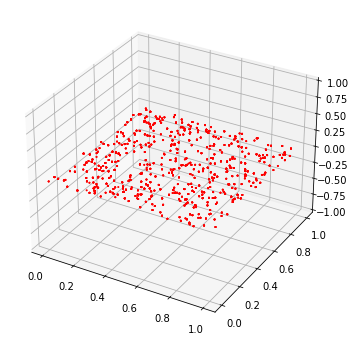

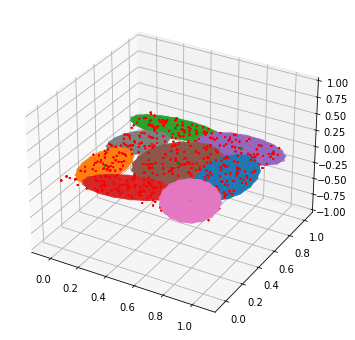

In [4]:
from lib.loader import * 
from lib.gmm_generation import *

from lib import visualization
mesh = load_unit_mesh(type = "square")

pcd = mesh.sample_points_uniformly(number_of_points=500)

cov_condition = 0.1
gmm = Gmm()
gmm.pc_hgmm(pcd,  min_points = 8,
                  max_mixtures = 800,
                  verbose = False,
                  cov_condition = cov_condition)

obj_list = (pcd, gmm)



fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax = visualization.visualize_gmm(gmm, ax = ax, show_mean = True, cov_scale = 2.0, show = False, color = None)
ax.set_zlim3d(bottom=-1.0, top=1.0)

plt.show()



fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax = visualization.visualize_pc(pcd, ax = ax, sensor_origin = None,
                     show = False, c = 'r')
ax.set_zlim3d(bottom=-1.0, top=1.0)
plt.show()


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax = visualization.visualize_pc(pcd, ax = ax, sensor_origin = None,
                     show = False, c = 'r')
ax = visualization.visualize_gmm(gmm, ax = ax, show_mean = True, cov_scale = 2.0, show = False, color = None)

ax.set_zlim3d(bottom=-1.0, top=1.0)
plt.show()